# Aprendizado Não-Supervisionado (Clustering)

## K-Means Clustering

In [17]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv('store.csv')

In [19]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
data.columns = ['IdCliente', 'Genero', 'Idade', 'Renda Anual',
       'Nivel de Gasto (1-100)']

In [22]:
data.head()

,IdCliente,Genero,Idade,Renda Anual,Nivel de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.set_index('IdCliente',inplace=True)

In [25]:
df = data[['Renda Anual','Nivel de Gasto (1-100)']]

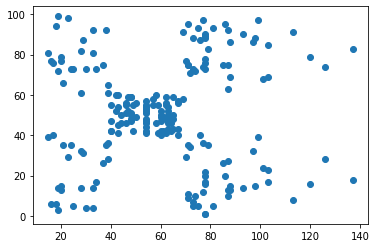

In [26]:
plt.scatter(df['Renda Anual'],df['Nivel de Gasto (1-100)'])

# Identificar quantidade de Clusters
Método Elbow (Cotovelo)

In [28]:
from sklearn.cluster import KMeans

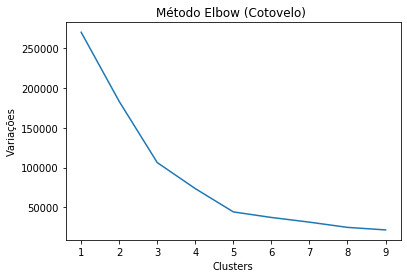

In [36]:
variacoes = []
X = df.values

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)
    
plt.plot(range(1,10),variacoes)
plt.title('Método Elbow (Cotovelo) ')
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

In [37]:
kmeans_final = KMeans(n_clusters=5)

In [38]:
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
cluster_pred = kmeans_final.predict(X)

In [41]:
cluster_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [42]:
cluster_centro = kmeans_final.cluster_centers_

In [43]:
cluster_centro

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

In [47]:
X[cluster_pred==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39])

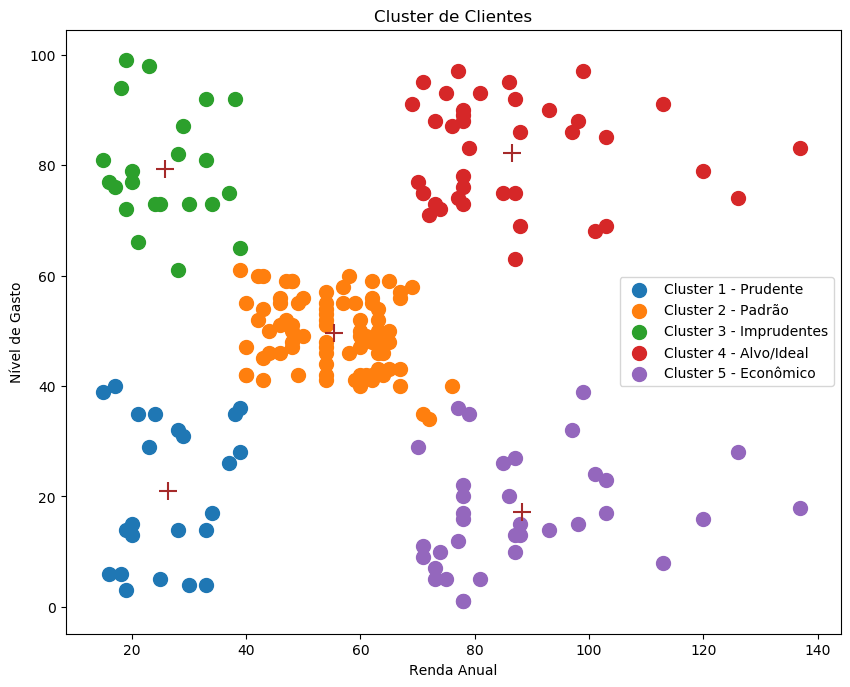

In [83]:
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1],s=100,label='Cluster 1 - Prudente')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1],s=100,label='Cluster 2 - Padrão')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1],s=100,label='Cluster 3 - Imprudentes')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1],s=100,label='Cluster 4 - Alvo/Ideal')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1],s=100,label='Cluster 5 - Econômico')
plt.legend()
plt.title('Cluster de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')

plt.scatter(cluster_centro[:,0],cluster_centro[:,1],marker='+',s=150,color='Brown')
plt.show()